In [1]:
from continous_data_classification import event_detection
from continous_data_classification import plot_detection_results
from zenodo_get import zenodo_get
from obspy.clients.fdsn import Client
client = Client('IRIS')
import obspy
import pandas as pd
from joblib import dump, load
import os

## Downloading the model and scaler parameters


Now we are downloading the trained model and scaler parameters files stored remotely on a Zenodo repository. 
We are downloading three trained random forest models and corresponding scaler parameter files. 

The nomenclature of the model is as follows - P_before_after_F_lowcut_highcut_new sampling rate
So for example if the file is named as P_10_30_F_1_15_50, that means that the model is trained on the waveforms that start 10s before the first arrival and 30 



Description
This dataset contains three trained  random forest models named as following - 

- P_10_100_F_1_10_50.joblib - This is a model trained on 110s long waveforms (origin time - 10, origin time +100) in case of earthquakes and explosions and (first arrival pick -10, first arrival pick + 100) in case of surface events, the waveforms are tapered using 10% cosine taper, bandpass filtered between 1-10 Hz using Butterworth four corner filter, normalized and resampled to 50 Hz. 
- P_50_100_F_1_10_50.joblib 
- P_10_30_F_1_15_50.joblib. 


And also the standard scaler parameters for each features that will be used to normalize them. 

In [2]:
doi = '10.5281/zenodo.12629637'
files = zenodo_get([doi])

Title: Trained Random Forest Model for PNW Seismic Event Classification Trained on 150s waveforms (P-50, P+100), 50 Hz, and 1-10 Hz BP Filtered
Keywords: 
Publication date: 2024-07-03
DOI: 10.5281/zenodo.12637440
Total size: 556.7 MB

Link: https://zenodo.org/record/12637440/files/best_rf_model_all_features_P_10_30_F_1_15_50.joblib   size: 171.2 MB

Checksum is correct. (4df4e7198e33653ba2cfd25e21125851)

Link: https://zenodo.org/record/12637440/files/scaler_params_P_10_30_F_1_15_50.csv   size: 0.0 MB

Checksum is correct. (37c418d3490c660b6011ac49b924ccff)

Link: https://zenodo.org/record/12637440/files/scaler_params_P_10_100_F_1_10_50.csv   size: 0.0 MB

Checksum is correct. (cf87a0b9809162190310370cb2da75ba)

Link: https://zenodo.org/record/12637440/files/scaler_params_P_50_100_F_1_10_50.csv   size: 0.0 MB

Checksum is correct. (a7850cae8ca3b3077684412d59efb40d)

Link: https://zenodo.org/record/12637440/files/best_rf_model_all_features_P_50_100_F_1_10_50.joblib   size: 198.4 MB

Che

## Specify model

In [20]:
## Parameters to set before running this script. 

## For 150s model (default)
#filename = 'P_50_100_F_1_10_50'


## For 110s model, uncomment this 
#filename = 'P_10_100_F_1_10_50'

## For 40s model, uncomment this - 
filename = 'P_10_30_F_1_15_50'






## These parameters will be automatically defined from the model name, so no need to edit this

In [21]:
lowcut = 1  # lower limit of bandpass 
highcut = int(filename.split('_')[5]) # higher limit of bandpass


## window length for moving across the trace (s)
win = int(filename.split('_')[1]) + int(filename.split('_')[2])

## samp_rate
samp_freq = 100
fs = 100

num_corners = 4

original_sr = 100
new_sr = int(filename.split('_')[-1])



scaler_params = pd.read_csv('scaler_params_'+filename+'.csv')
best_model = load('best_rf_model_all_features_'+filename+'.joblib')



## User Defined Parameters for specific case. 

In [22]:
## stride (s)
stride = 10


before = 150 
starttime = obspy.UTCDateTime(2024, 7, 2, 5, 11, 11) - before
dur = 300


stations_id = ['CC.SEP', 'CC.REM',  'CC.MIDE', 'CC.WESG', 'UW.NSP', 'UW.ROA']
location = '*'

## Run the following cell (No modification is needed)

In [23]:
result_stns, index_stns, prob_stns, st_overall, st_overall_data, st_overall_times  = event_detection(starttime = starttime, stations_id = stations_id, dur = dur, stride = stride, new_sr = new_sr, 
                           original_sr = original_sr, lowcut = lowcut, highcut = highcut, num_corners = num_corners, scaler_params = scaler_params, best_model = best_model, location = location, samp_freq = samp_freq, win = win)





100%|██████████| 31/31 [00:00<00:00, 288300.27it/s]

100%|██████████| 31/31 [00:00<00:00, 396412.88it/s]

1 Trace(s) in Stream:
CC.SEP..BHZ | 2024-07-02T05:08:41.000000Z - 2024-07-02T05:13:41.010000Z | 100.0 Hz, 30002 samples



100%|██████████| 31/31 [00:00<00:00, 323441.35it/s]

100%|██████████| 31/31 [00:00<00:00, 407596.94it/s]

1 Trace(s) in Stream:
CC.REM..BHZ | 2024-07-02T05:08:41.000000Z - 2024-07-02T05:13:41.010000Z | 100.0 Hz, 30002 samples



 50%|█████     | 3/6 [00:15<00:13,  4.41s/it]

0 Trace(s) in Stream:



 67%|██████▋   | 4/6 [00:16<00:05,  2.97s/it]

0 Trace(s) in Stream:



 83%|████████▎ | 5/6 [00:16<00:02,  2.18s/it]

0 Trace(s) in Stream:



100%|██████████| 6/6 [00:17<00:00,  2.95s/it]

0 Trace(s) in Stream:



27


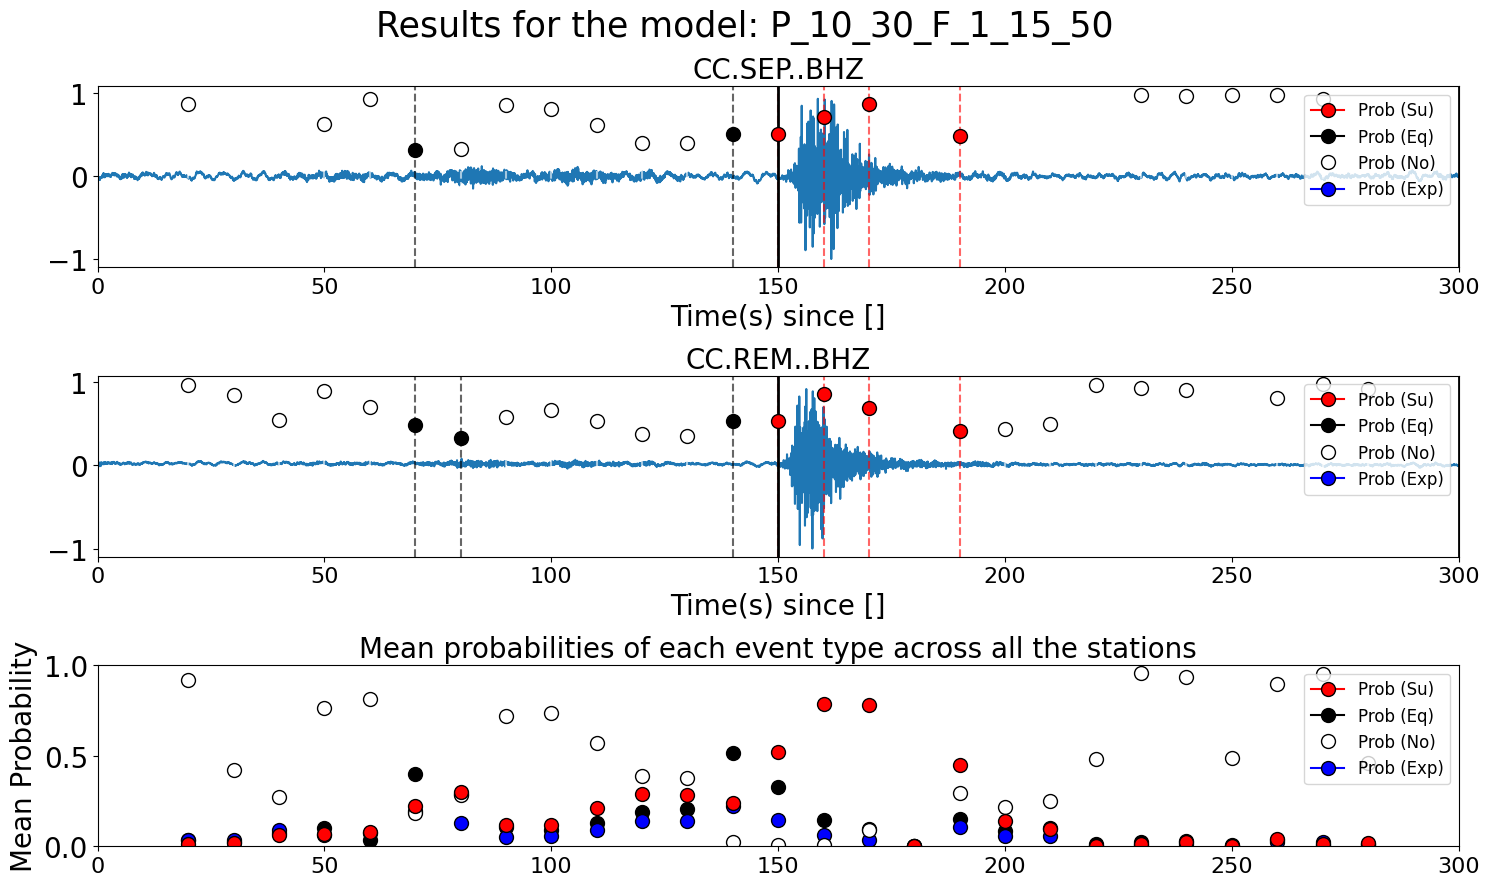

In [24]:
plot_detection_results(st_overall_data = st_overall_data, st_overall_times = st_overall_times, 
                       st_overall = st_overall, result_stns = result_stns, index_stns = index_stns, 
                       prob_stns = prob_stns, xlim = [0,dur], ev_markers = [before,dur], shift = stride, win = win, filename = filename)

## Deleting the large downloaded files 
so we can push to github repository.


In [25]:
# Get the current working directory
directory = os.getcwd()

# List the files in the directory
files = os.listdir(directory)

# Iterate over the files and delete CSV files
for file in files:
    if file.endswith(".joblib"):
        file_path = os.path.join(directory, file)
        os.remove(file_path)
        
# Iterate over the files and delete CSV files
for file in files:
    if file.endswith(".csv"):
        file_path = os.path.join(directory, file)
        os.remove(file_path)